In [870]:
import numpy as np
import matplotlib.pyplot as plt
import math 

In [871]:
#Parameters: 
x_prime = 5/4
x_a, x_b = 1, 2
max_n = 30

Greens function for eigenfunction method

In [872]:
# Eigenfunction method
def lambda_n(n):
  lambda_i = ((n * np.pi)/(np.log(2)))**2
  return lambda_i

xs = np.linspace(x_a, x_b, 1000)
G_sum = 0
Gs = np.zeros_like(xs)
ln2 = np.log(2)
#compute sum up to max_n 
for n in range(1, max_n):
  lambdaa = lambda_n(n)
  G_n = -(2/(lambdaa*ln2))*np.sin((n*np.pi/ln2)*np.log(x_prime))*np.sin((n*np.pi/ln2)*np.log(xs))
  Gs += G_n

Greens function for patching method

In [873]:
#Patching Method
xs_L = np.linspace(x_a, x_prime, 1000)
xs_R = np.linspace(x_prime, x_b, 1000)

#coefficient for left of x prime
aL_num = (x_prime - 3)*np.log(3-x_prime)
aL_den = x_prime * ((x_prime*np.log(x_prime)) + ((3 - x_prime)*np.log(3 - x_prime)))
a_L = aL_num/aL_den

#coefficient for right of x prime
aR_num = (x_prime - 3)*np.log(x_prime)
aR_den = aL_den
a_R = aR_num/ aR_den

#greens function for left and right 
Gs_L = a_L * np.log(xs_L) 
Gs_R = a_R * np.log(3 - xs_R)




Plot to compare greens functions 

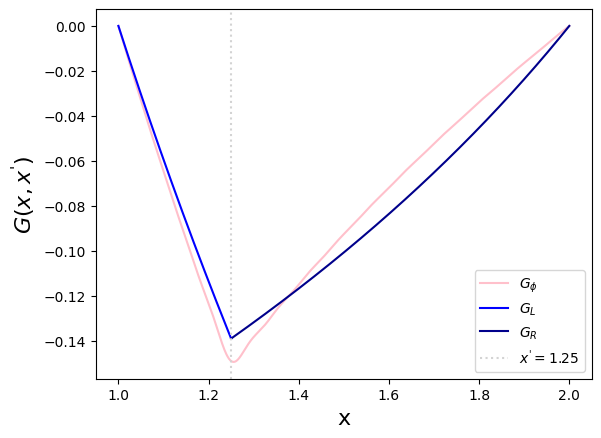

In [874]:
# eigenfunction plot
plt.plot(xs, Gs, color = "pink", label = rf"$G_\phi$")

#patching plot
plt.plot(xs_L, Gs_L, color = "blue", label = rf"$G_L$")
plt.plot(xs_R, Gs_R, color = "darkblue", label = rf"$G_R$")

#labeling 
plt.ylabel(rf"$G(x, x^')$", fontsize = 16)
plt.xlabel("x", fontsize = 16)
plt.axvline(x_prime, label = rf"$x^' = ${x_prime}", linestyle = "dotted", color = "lightgrey")
plt.legend()

Solution to equation

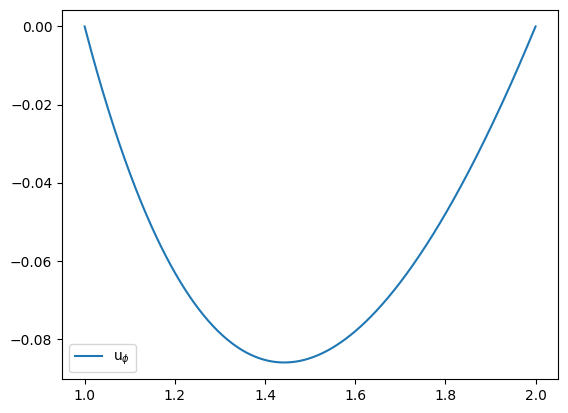

In [883]:
#plot eigen solution F(x) = 1
xs = np.linspace(x_a, x_b, 1000)
u_eig = 0
for n in range(1, max_n):
  lambdaa = lambda_n(n)
  integral = ((ln2)*(np.pi*n -2*np.pi*n*np.cos(n*np.pi) + np.log(4)*np.sin(np.pi*n)))/(((n*np.pi)**2) + (ln2**2))
  u_n = -(2/(lambdaa*ln2))*np.sin((n*np.pi/ln2)*np.log(xs))*integral
  u_eig += u_n
plt.plot(xs, u_eig, label = rf"u$_\phi$")
plt.legend()